In [35]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [36]:
T = pd.read_csv('../TOST_data/average_properties.txt',
            sep='\t',index_col=0,na_values=-99,
            dtype={'WEIGHT_GRAMS': float,
                   'GEST_AGE_DAYS':float,
                   'DELTA_SEC_MEASURE':float,
                   'MED_SPO2':float,
                   'MED_PI':float,
                   'MED_PR':float,
                   'MEAN_SPO2':float,
                   'MEAN_PI':float,
                   'MEAN_PR':float,
                   'STD_SPO2':float,
                   'STD_PI':float,
                   'STD_PR':float,
                   'BRADY_SEC_PR':float,
                   'BRADY_RATIO_PR':float,
                   'BRADY_RATIO_PR_m10':float,
                   'BRADY_RATIO_PR_m20':float,
                   'BRADY_RATIO_PR_m30':float,
                   'BRADY_RATIO_PR_m40':float,
                   'BRADY_SEC_SPO2':float,
                   'BRADY_RATIO_SPO2':float,
                   'BRADY_SEC_PR_DYN':float,
                   'BRADY_RATIO_PR_DYN':float})

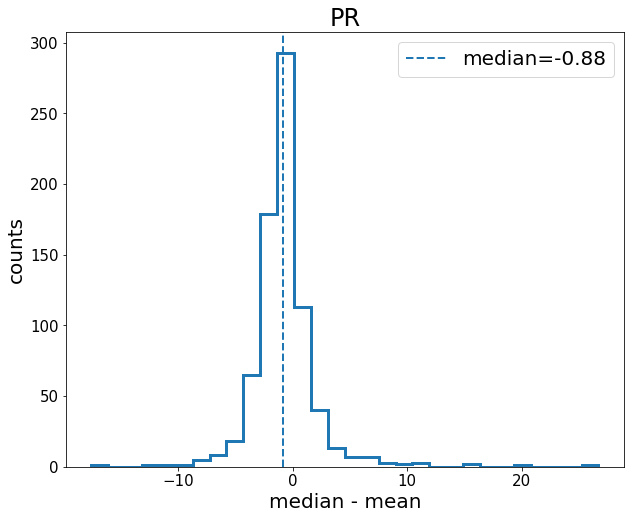

In [37]:
plt.figure(figsize=(10,8))
diff = T['MED_PR']-T['MEAN_PR']
plt.hist(diff,bins=30,histtype='step',lw=3)
plt.axvline(np.median(diff),ls='dashed',lw=2,label='median=%.2f'%np.median(diff))
plt.xlabel('median - mean')
plt.ylabel('counts')
plt.title('PR')
plt.legend()
plt.show()

In [38]:
T['BABY_IDS'][np.abs(T['MED_PR']-T['MEAN_PR'])>10]

48      FMC012
87      FMC019
189    PLC 012
199    PLC 013
219    PLC 015
339     PLC024
344     PLC026
386     FMC082
434    PLC 028
493    PLC 035
567     FMC117
Name: BABY_IDS, dtype: object

In [39]:
files_to_adjast = T['FILE'][np.abs(T['MED_PR']-T['MEAN_PR'])>10]

In [121]:
for f in files_to_adjast:
    print(f.split('/')[-1])

G_PHN_FMC012_Day4_Rt wrist.csv
G_PHN_FMC019_Day3_Rt wrist.csv
G_PLC012_Day1_Foot.csv
G_PLC013_Day1_foot.csv
G_PLC015_Day2_Foot.csv
G_PLC024_Day1_Rt wrist.csv
G_PLC026_Day1_Rt foot.csv
G_PHN_FMC082_Day5_Rt wrist.csv
G_PLC028_Day2_Rt Foot.csv
G_PLC035_Day1_Rt Wrist.csv
G_PHN_FMC117_Day5_Rt Foot.csv


# Let's create babies

In [41]:
FMC012 = baby('FMC012')

In [154]:
def plot_baby_measurements(name,filenumber,with_bad_values=False):

    b = baby(name)
    
    print(b.files[filenumber].split('/')[-1])
    
    pr   = b.measurements[filenumber]['PR']
    spo2 = b.measurements[filenumber]['SpO2']
    time = b.measurements[filenumber]['Time']
    date_dirty = b.measurements[filenumber]['Date']
    
    try:
        pi = b.measurements[filenumber]['PI']
    except:
        pass
    
    
    date = []#np.zeros(len(date_dirty))
    date_time = []#np.zeros(len(date_dirty))
    delta_sec = []#np.zeros(len(date_dirty))
    # correct date in the right format
    for i in range(len(date_dirty)):
        date.append(interpret_date(date_dirty[i],birth=b.birth))
    
        date_time.append(datetime(year=date[i].year,
                            month=date[i].month,
                            day=date[i].day,
                            hour=int(str(time[i]).split(':')[0]),
                            minute=int(str(time[i]).split(':')[1]),
                            second=int(str(time[i]).split(':')[2])))
    
    
        delta_sec.append((date_time[i] - b.birth).seconds + ((date_time[i] - b.birth).days) * 24 * 60 * 60)
    
    #date = np.array(date)
    #date_time = np.array(date_time)
    
    delta_sec = np.array(delta_sec)
    delta_hour = np.array(delta_sec/60./60.)

    plt.figure(figsize=(7,5))
    if with_bad_values:
        plt.plot(delta_hour,pr,".r")
    plt.title(name)
    plt.xlabel('hours since birth')
    plt.ylabel('mean PR')
    plt.plot(delta_hour[pr>10.],pr[pr>10.],".b")
    plt.axhline(b.measurements_PR_mean[filenumber],color='k',label='mean %.2f'%b.measurements_PR_mean[filenumber])
    plt.axhline(b.measurements_PR_median[filenumber],color='k',ls='dashed',label='median %.2f'%b.measurements_PR_median[filenumber])
    plt.legend(fontsize='small')
    plt.show()

    plt.figure(figsize=(7,5))
    if with_bad_values:
        plt.plot(delta_hour,spo2,".r")
    plt.title(name)
    plt.xlabel('hours since birth')
    plt.ylabel('mean SpO2')
    plt.plot(delta_hour[spo2>10.],spo2[spo2>10.],".b")
    plt.axhline(b.measurements_SpO2_mean[filenumber],color="k",label='mean %.2f'%b.measurements_SpO2_mean[filenumber])
    plt.axhline(b.measurements_SpO2_median[filenumber],color="k",ls='dashed',label='median %.2f'%b.measurements_SpO2_median[filenumber])
    plt.legend(fontsize='small')
    plt.show()
    
    
    
    try:
        plt.figure(figsize=(7,5))
        if with_bad_values:
            plt.plot(delta_hour,pi,".r")
        plt.title(name)
        plt.xlabel('hours since birth')
        plt.ylabel('mean pi')
        plt.plot(delta_hour[pi>0.000001],pi[pi>0.000001],".b")
        plt.axhline(b.measurements_PI_mean[filenumber],color="k",label='mean %.2f'%b.measurements_PI_mean[filenumber])
        plt.axhline(b.measurements_PI_median[filenumber],color="k",ls='dashed',label='median %.2f'%b.measurements_PI_median[filenumber])
        plt.legend(fontsize='small')
        plt.show()
    except:
        pass

G_PHN_FMC012_Day4_Rt wrist.csv


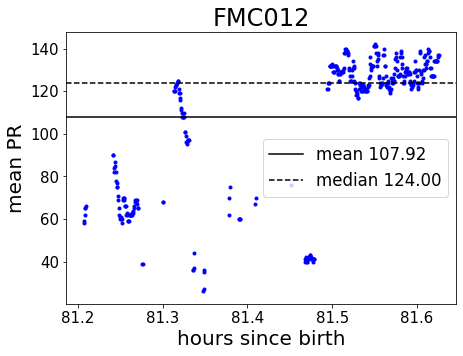

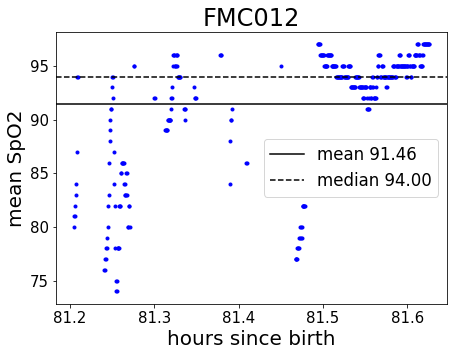

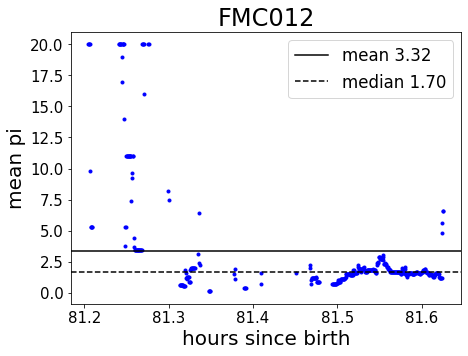

In [155]:
plot_baby_measurements('FMC012',3,with_bad_values=False)

G_PHN_FMC019_Day3_Rt wrist.csv


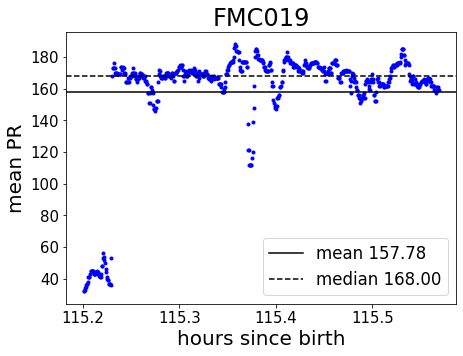

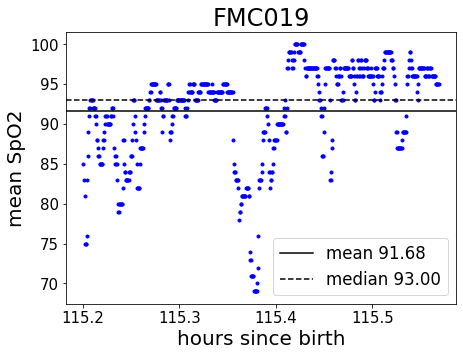

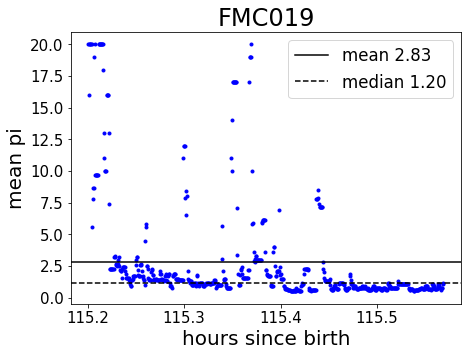

In [156]:
plot_baby_measurements('FMC019',3,with_bad_values=False)

G_PLC012_Day1_Foot.csv


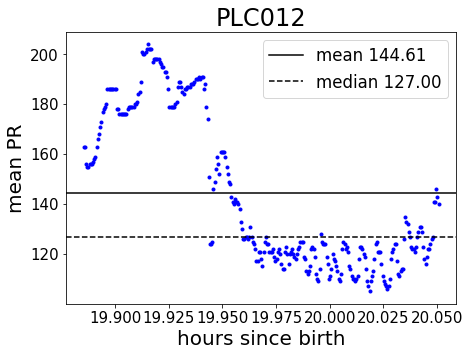

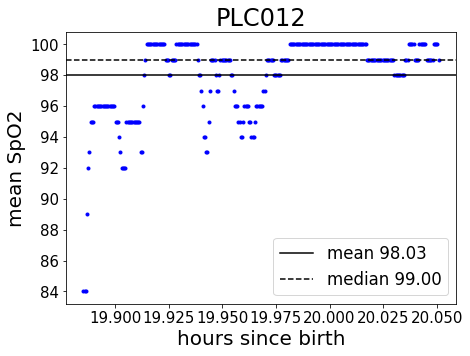

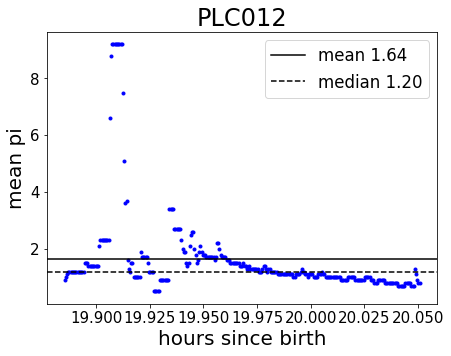

In [157]:
plot_baby_measurements('PLC012',0,with_bad_values=False)

G_PLC013_Day1_foot.csv


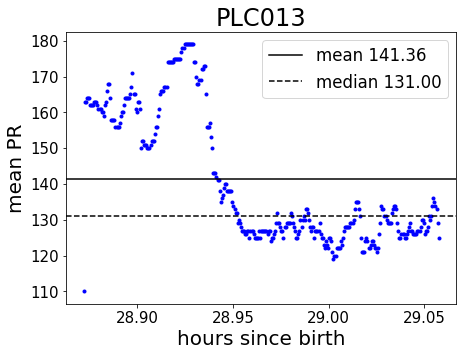

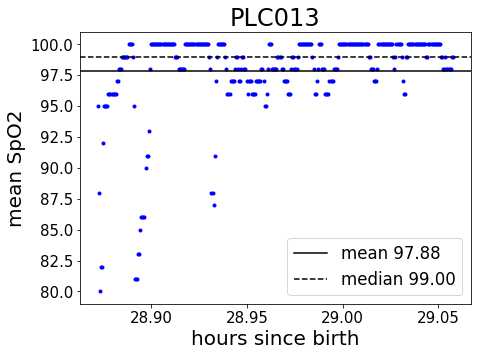

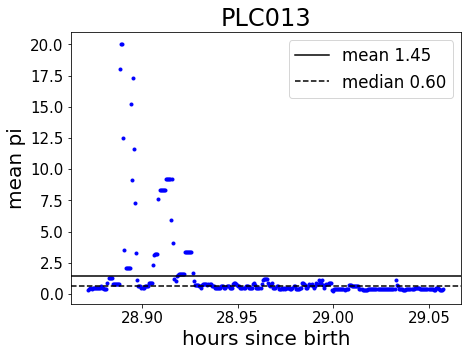

In [158]:
plot_baby_measurements('PLC013',0,with_bad_values=False)

G_PLC015_Day2_Foot.csv


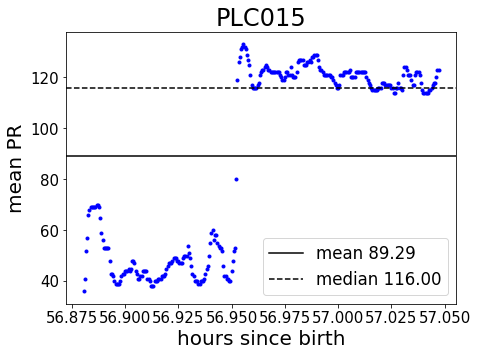

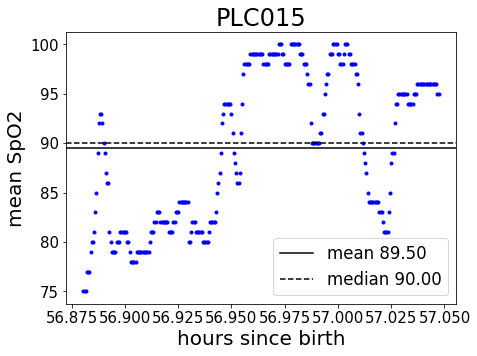

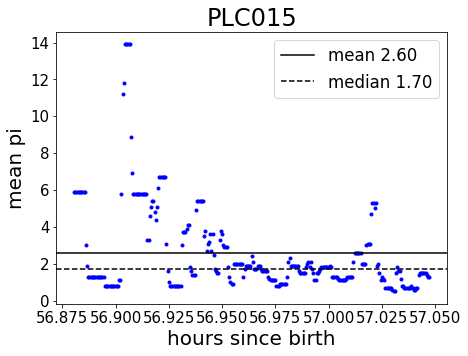

In [159]:
plot_baby_measurements('PLC015',2,with_bad_values=False)

G_PLC024_Day1_Rt wrist.csv


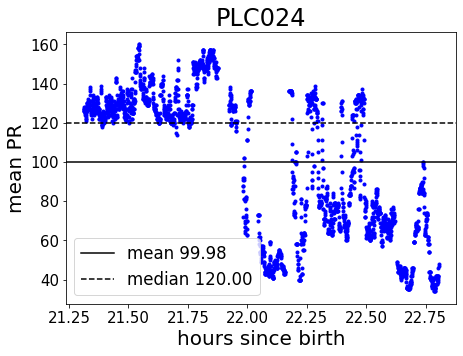

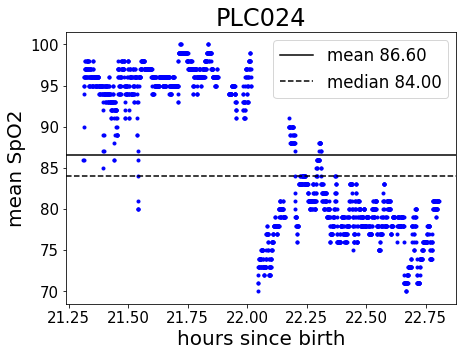

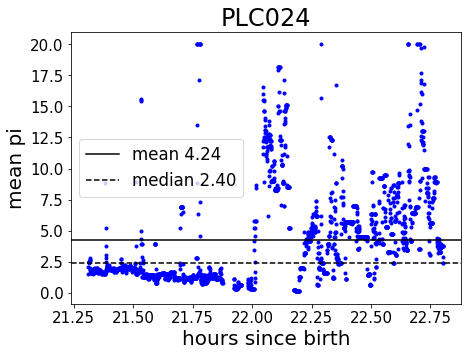

In [160]:
plot_baby_measurements('PLC024',1,with_bad_values=False)

G_PLC026_Day1_Rt foot.csv


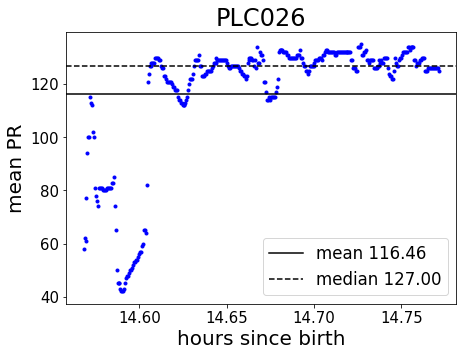

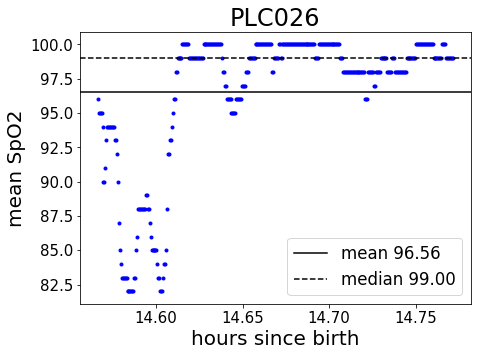

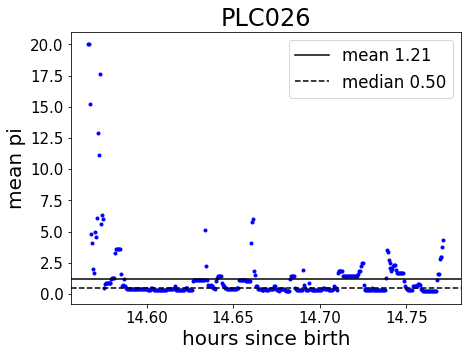

In [161]:
plot_baby_measurements('PLC026',2,with_bad_values=False)

G_PHN_FMC082_Day5_Rt wrist.csv


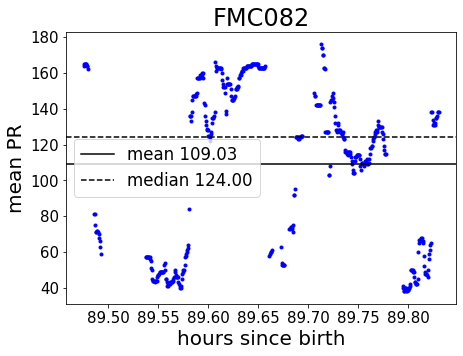

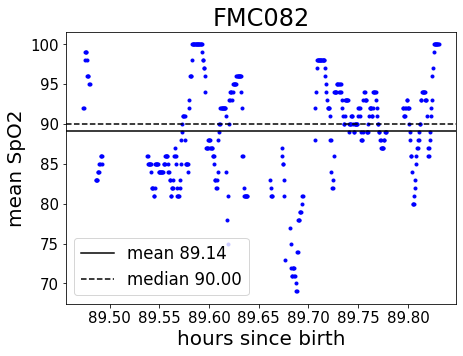

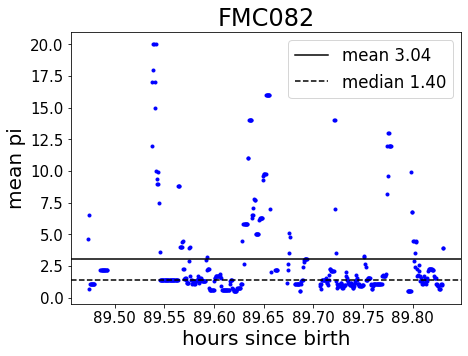

In [172]:
plot_baby_measurements('FMC082',5,with_bad_values=False)

G_PLC028_Day2_Rt Foot.csv


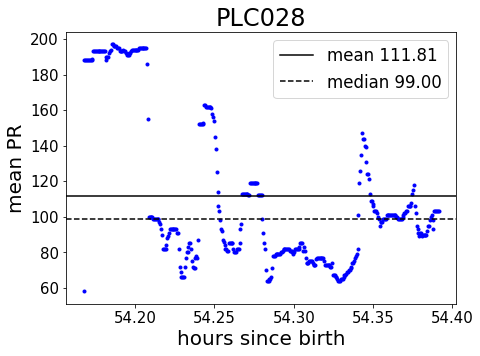

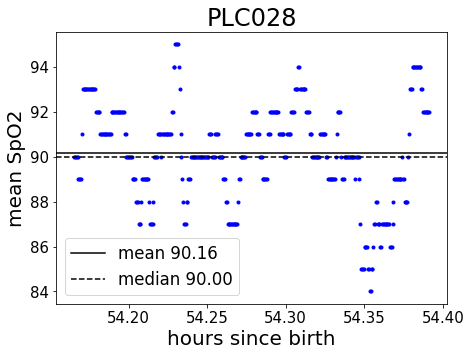

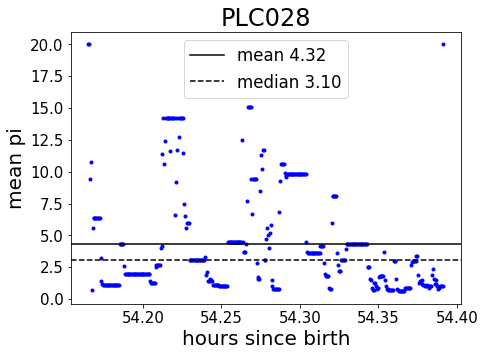

In [175]:
plot_baby_measurements('PLC028',2,with_bad_values=False)

G_PLC035_Day1_Rt Wrist.csv


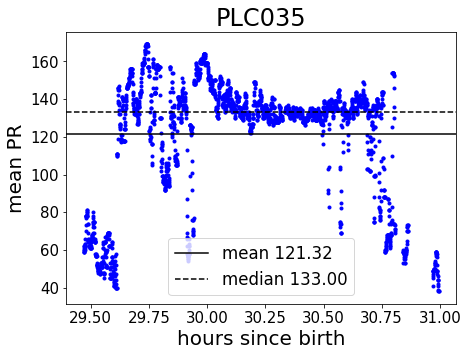

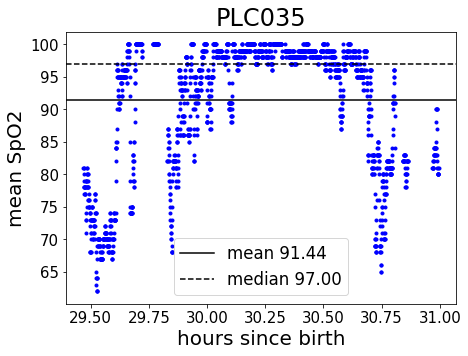

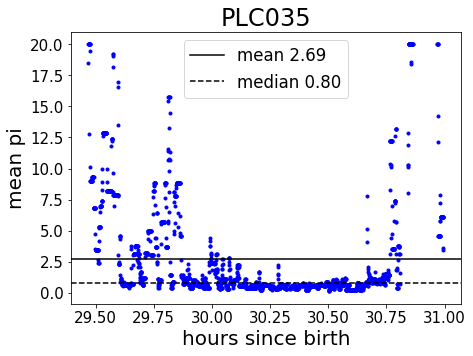

In [177]:
plot_baby_measurements('PLC035',1,with_bad_values=False)

G_PHN_FMC117_Day5_Rt Foot.csv


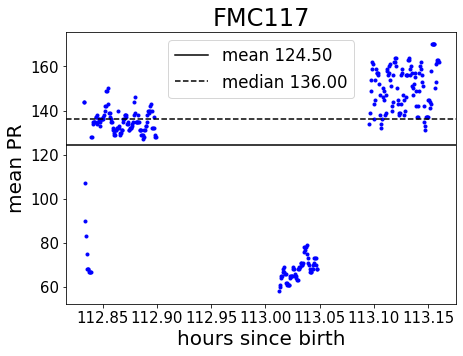

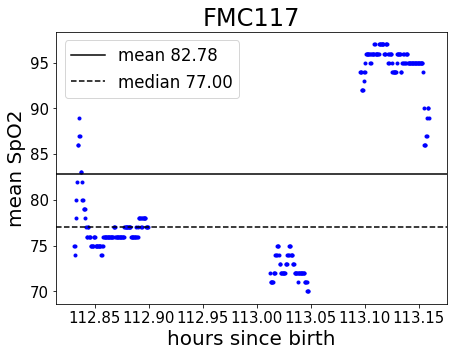

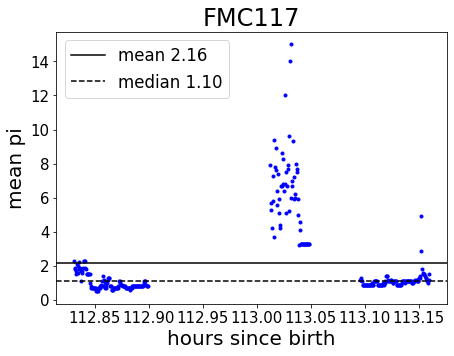

In [187]:
plot_baby_measurements('FMC117',2,with_bad_values=False)

G_PHN_FMC117_Day5_Rt Wrist.csv


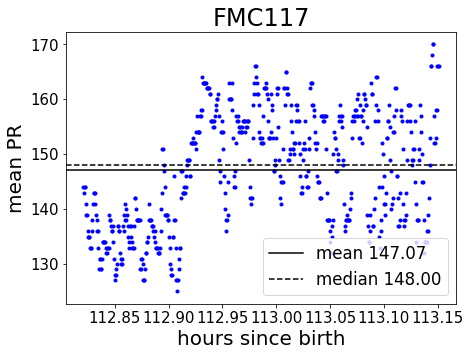

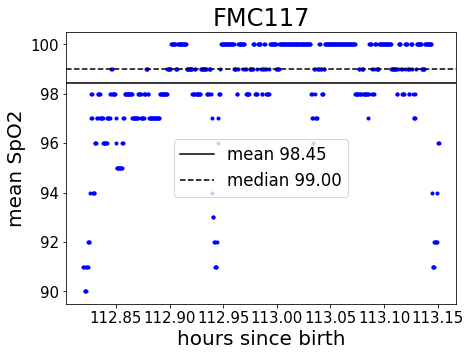

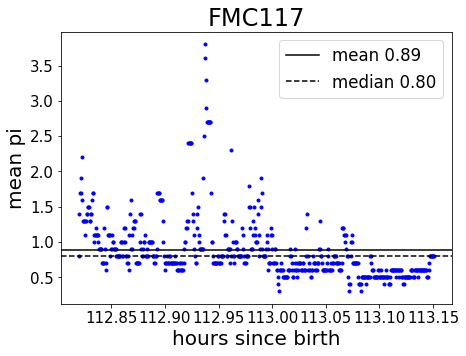

In [188]:
plot_baby_measurements('FMC117',3,with_bad_values=False)

G_FMC117_Day1_Rt Wrist.csv


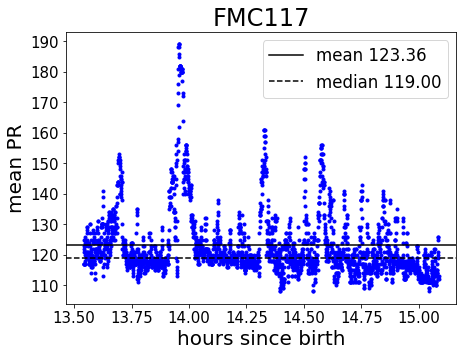

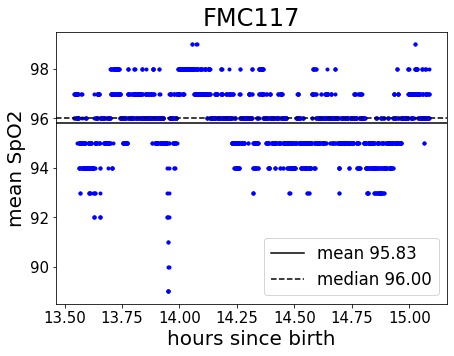

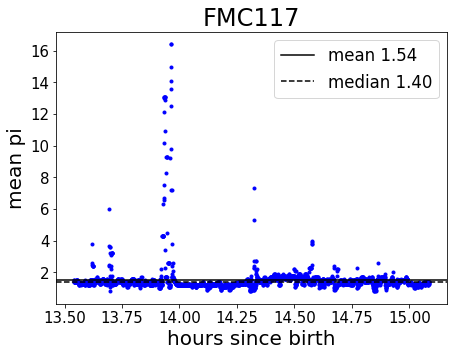

In [189]:
plot_baby_measurements('FMC117',1,with_bad_values=False)

In [163]:
for d in FMC012.measurements[3]['Date']:
    print(interpret_date(d,birth=FMC012.birth))

2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13
2014-03-13